# Linear regression with Keras

We use scikit-learn to load and preprocess the Boston housing data.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
# Important: get the target into correct shape for Keras
y = y.reshape(-1,1)
y.shape

(506, 1)

In [4]:
y[:5,:]

array([[ 24. ],
       [ 21.6],
       [ 34.7],
       [ 33.4],
       [ 36.2]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# some housekeeping
input_dim = X_train.shape[1]
output_dim = 1 # for regression

### Hyperparameters

In [8]:
learning_rate = 0.025
num_epochs = 100

### Define the model

In [9]:
model = Sequential()

# Options (from documentation)
# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
#       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#       bias_constraint=None, **kwargs)
# `Dense` implements the operation: `output = activation(dot(input, kernel) + bias)`

# activation = None for regression
model.add(Dense(units = output_dim, input_dim = input_dim, kernel_initializer='normal')) 

### Compile model

In [10]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = learning_rate))

In [11]:
# number of parameters = num. features + bias
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [12]:
# we keep the losses in the history object, for later plotting
history = model.fit(X_train, y_train, epochs = num_epochs)

Epoch 1/100
404/404 [==============================] - 0s - loss: 581.0967     
Epoch 2/100
404/404 [==============================] - 0s - loss: 548.4098     
Epoch 3/100
404/404 [==============================] - 0s - loss: 524.8896     
Epoch 4/100
404/404 [==============================] - 0s - loss: 504.6164     
Epoch 5/100
404/404 [==============================] - 0s - loss: 488.3942     
Epoch 6/100
404/404 [==============================] - 0s - loss: 471.9430     
Epoch 7/100
404/404 [==============================] - 0s - loss: 456.8786     
Epoch 8/100
404/404 [==============================] - 0s - loss: 442.4140     
Epoch 9/100
404/404 [==============================] - 0s - loss: 428.4890     
Epoch 10/100
404/404 [==============================] - 0s - loss: 414.6607     
Epoch 11/100
404/404 [==============================] - 0s - loss: 401.3182     
Epoch 12/100
404/404 [==============================] - 0s - loss: 388.8952     
Epoch 13/100
404/404 [===============

### Evaluation on training set and test set

In [13]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

print("\n\nTraining cost: ", "{:.4f}".format(train_score))
print("\nTest cost: ", "{:.4f}".format(test_score))

 32/102 [========>.....................] - ETA: 0s

Training cost:  25.1908

Test cost:  41.2702


### Get model weights

In [14]:
# regression coefficients
model.get_weights()

[array([[-0.87664354],
        [ 0.86692572],
        [-0.33209491],
        [ 0.64673227],
        [-1.53050375],
        [ 2.73979402],
        [-0.23287554],
        [-2.65993214],
        [ 1.20217061],
        [-0.99486446],
        [-2.20698404],
        [ 0.75937206],
        [-3.51272011]], dtype=float32), array([ 20.22322655], dtype=float32)]

### Plot loss history

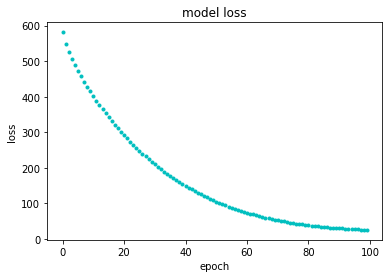

In [15]:
plt.plot(history.history['loss'], 'c.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Get predictions

In [18]:
# predictions are obtained using predict()
pred_train = model.predict(X_train)
pred_train[:10]

array([[ 30.09295273],
       [ 19.60911369],
       [ 25.16869926],
       [ 21.24581146],
       [  3.86369514],
       [ 11.95489025],
       [ 19.93047714],
       [ 26.7010231 ],
       [ 30.63434601],
       [ 10.08687687]], dtype=float32)

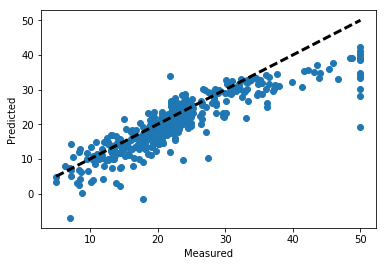

In [16]:
pred_train = model.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

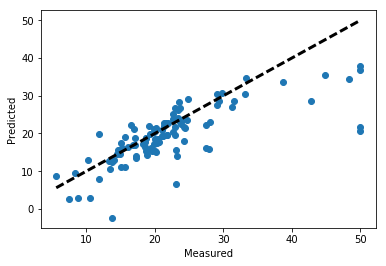

In [17]:
pred_test = model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()